# Predicting Hospital Readmission for Patients with Diabetics

# Data Preprocessing

### Importing libraries

To start with the model building, first step in the process is to import the required libraries. We are now going to import the required libraries such as numpy, pandas, matplotlib.pyplot and seaborn for our model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.svm import SVR

#### Importing and reading the dataset

The dataset namely, 'hospital_new.csv' is imported and read.

In [2]:
dataset=pd.read_csv('hospital_new.csv')

In [3]:
dataset

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,2,0,154,0,0,6,2,58,0,...,0,0,3,1,0,0,0,0,1,0
1,2,0,0,446,0,0,6,1,10,5,...,0,0,1,1,0,0,0,1,1,0
2,3,2,1,3,0,0,6,1,43,1,...,0,0,3,1,0,0,0,0,1,0
3,4,2,1,100,0,0,6,0,50,0,...,0,0,2,1,0,0,0,0,1,0
4,5,2,1,266,1,0,1,2,30,6,...,0,0,2,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98047,101761,0,1,688,0,2,6,2,50,0,...,0,0,0,1,0,0,0,0,1,0
98048,101762,0,0,376,0,3,4,4,32,3,...,0,0,2,1,0,0,0,1,1,0
98049,101763,2,1,15,0,0,6,0,52,0,...,0,0,0,1,0,0,0,0,1,0
98050,101764,2,0,670,1,2,6,9,44,2,...,0,0,3,1,0,0,0,0,1,0


In [4]:
dataset.head().T

,0,1,2,3,4
Unnamed: 0,1,2,3,4,5
race,2,0,2,2,2
gender,0,0,1,1,1
age,154,446,3,100,266
admission_type_id,0,0,0,0,1
discharge_disposition_id,0,0,0,0,0
admission_source_id,6,6,6,6,1
time_in_hospital,2,1,1,0,2
num_lab_procedures,58,10,43,50,30
num_procedures,0,5,1,0,6


This dataset contains 43 different columns and 98052 rows in which the last column 'readmitted'(which shows whether a patient is readmitted in a hospital or not) is to be predicted.There are many input columns which effect the prediction such as, age of the patient, time a particular patient has been in hospital, number of lab procedures and other medication procedures undergone by the patient etc., are being listed. 

In [56]:
dataset['race'].unique()

array([2, 0, 4, 1, 3], dtype=int64)

In [57]:
dataset['num_procedures'].unique()

array([0, 5, 1, 6, 2, 3, 4], dtype=int64)

In [58]:
dataset['time_in_hospital'].unique()

array([ 2,  1,  0,  3,  4, 12, 11,  8,  6,  9, 10,  5,  7, 13],
      dtype=int64)

In [59]:
dataset['num_medications'].unique()

array([17, 12, 15,  7, 20, 11, 27, 16, 10, 14, 30,  1, 22, 18,  6, 19, 13,
        9, 21,  8, 26, 24, 31,  5, 29, 25, 23,  3, 32,  4, 38,  2, 28, 60,
        0, 39, 45, 40, 35, 33, 34, 49, 42, 41, 36, 50, 37, 44, 53, 51, 48,
       61, 54, 46, 43, 47, 56, 52, 58, 55, 62, 57, 69, 66, 63, 59, 68, 64,
       67, 65, 74, 73, 72, 70, 71], dtype=int64)

In [60]:
dataset['change'].unique()

array([0, 1], dtype=int64)

In [61]:
#data correlation is done and rounded the values to three decimal places.

dataset.corr().round(3)

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,...,rosiglitazone,acarbose,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
race,1.000,0.067,-0.039,-0.008,0.010,-0.020,-0.022,0.028,0.028,-0.003,...,0.004,0.015,-0.019,0.010,0.005,0.001,0.001,-0.014,0.003,-0.003
gender,0.067,1.000,-0.008,-0.021,-0.006,-0.029,-0.002,0.061,-0.022,-0.044,...,0.010,0.011,0.003,0.004,0.007,-0.003,-0.003,-0.015,0.016,-0.003
age,-0.039,-0.008,1.000,0.005,0.031,-0.096,-0.022,-0.067,-0.039,-0.072,...,0.002,-0.002,0.018,0.005,-0.000,0.006,0.002,-0.033,0.023,-0.000
discharge_disposition_id,-0.008,-0.021,0.005,1.000,0.012,0.165,0.024,0.014,0.107,-0.012,...,-0.006,0.006,-0.022,-0.005,0.000,-0.002,-0.000,0.014,-0.030,0.049
admission_source_id,0.010,-0.006,0.031,0.012,1.000,-0.005,0.085,-0.157,-0.070,0.013,...,-0.012,0.000,-0.010,-0.022,0.000,0.001,-0.004,-0.002,0.000,0.007
time_in_hospital,-0.020,-0.029,-0.096,0.165,-0.005,1.000,0.319,0.191,0.464,-0.045,...,0.006,0.006,0.047,-0.002,-0.001,-0.003,0.002,-0.108,0.062,0.043
num_lab_procedures,-0.022,-0.002,-0.022,0.024,0.085,0.319,1.000,0.059,0.268,-0.056,...,-0.008,-0.000,0.034,-0.010,-0.008,-0.001,-0.003,-0.063,0.032,0.020
num_procedures,0.028,0.061,-0.067,0.014,-0.157,0.191,0.059,1.000,0.383,-0.140,...,0.011,-0.002,0.012,-0.001,-0.005,-0.003,-0.001,-0.005,-0.005,-0.012
num_medications,0.028,-0.022,-0.039,0.107,-0.070,0.464,0.268,0.383,1.000,-0.129,...,0.050,0.018,0.080,0.009,0.003,-0.004,0.002,-0.247,0.189,0.038
diag_1,-0.003,-0.044,-0.072,-0.012,0.013,-0.045,-0.056,-0.140,-0.129,1.000,...,0.017,0.002,-0.020,0.008,0.003,-0.002,0.001,0.012,-0.006,-0.002


In [5]:
type(dataset)

pandas.core.frame.DataFrame

Here we find the type of the dataset 'hospital_new.csv' is pandas dataframe.

In [6]:
dataset.describe()

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,...,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000
mean,51115.772610,1.658987,0.461174,362.956339,1.025803,2.716242,4.565659,3.422011,42.147789,1.350712,...,0.000031,0.000388,1.401042,1.006823,0.000133,0.000010,0.000010,0.538225,0.768470,0.112858
std,29307.328017,0.860854,0.498493,170.439332,1.450121,5.174012,3.519851,2.993070,19.709154,1.708475,...,0.005531,0.020194,0.839101,0.083427,0.011514,0.003194,0.003194,0.498539,0.421813,0.316421
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25574.750000,2.000000,0.000000,266.000000,0.000000,0.000000,0.000000,1.000000,30.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,51369.500000,2.000000,0.000000,328.000000,0.000000,0.000000,6.000000,3.000000,43.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,76379.250000,2.000000,1.000000,489.000000,2.000000,3.000000,6.000000,5.000000,56.000000,2.000000,...,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,101765.000000,4.000000,1.000000,706.000000,7.000000,25.000000,16.000000,13.000000,117.000000,6.000000,...,1.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dataset.shape

(98052, 43)

#### Checking for missing values

In [8]:
dataset.isnull().any()

Unnamed: 0                  False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide                 False
pioglitazone  

There are no missing values in the dataset.

In this dataset there are a few unwanted columns that are unique for all the patients and which do not effect the prediction of readmitted patients.Hence columns such as Unnamed: 0, number_outpatient, number_inpatient, number_emergency are dropped from the dataset. 

In [9]:
dataset.drop(['Unnamed: 0','number_outpatient', 'number_inpatient', 'number_emergency','admission_type_id','max_glu_serum','miglitol','troglitazone','tolazamide','nateglinide','chlorpropamide','repaglinide','acetohexamide'],axis = 1,inplace=True)

In [10]:
dataset.head(51).T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
race,2,0,2,2,2,2,2,2,2,0,...,2,2,2,2,2,0,2,0,0,2
gender,0,0,1,1,1,1,1,0,0,0,...,0,0,1,1,1,1,1,0,0,0
age,154,446,3,100,266,266,278,256,284,680,...,432,278,173,266,278,99,672,679,526,87
discharge_disposition_id,0,0,0,0,0,0,0,0,2,0,...,0,4,2,0,5,0,0,5,0,0
admission_source_id,6,6,6,6,1,1,6,3,3,6,...,1,3,3,1,3,1,1,6,6,1
time_in_hospital,2,1,1,0,2,3,4,12,11,8,...,1,8,8,5,10,3,4,7,0,5
num_lab_procedures,58,10,43,50,30,69,72,67,32,46,...,9,24,1,64,66,39,43,54,52,57
num_procedures,0,5,1,0,6,1,0,2,3,2,...,3,3,0,5,2,1,5,2,0,3
num_medications,17,12,15,7,15,20,11,27,17,16,...,7,15,11,18,24,13,12,16,10,13
diag_1,8,1,0,0,0,0,0,0,0,0,...,1,0,8,0,0,0,0,0,3,0


In [11]:
dataset.corr()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,...,rosiglitazone,acarbose,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
race,1.000000,0.067074,-0.038533,-0.008028,0.009778,-0.020477,-0.022028,0.027708,0.028482,-0.002890,...,0.004475,0.015223,-0.019249,0.009676,0.004562,0.001265,0.001265,-0.013602,0.002762,-0.003008
gender,0.067074,1.000000,-0.008295,-0.021043,-0.006345,-0.028961,-0.002368,0.061339,-0.022111,-0.044316,...,0.010141,0.011412,0.002786,0.003795,0.007116,-0.002954,-0.002954,-0.015019,0.015742,-0.002544
age,-0.038533,-0.008295,1.000000,0.005368,0.031107,-0.096451,-0.021685,-0.067431,-0.039212,-0.072323,...,0.002390,-0.002043,0.017967,0.005087,-0.000054,0.005959,0.002362,-0.032532,0.022976,-0.000088
discharge_disposition_id,-0.008028,-0.021043,0.005368,1.000000,0.012451,0.164805,0.023552,0.014169,0.107185,-0.012349,...,-0.005946,0.005895,-0.022065,-0.005131,0.000460,-0.001677,-0.000442,0.014404,-0.029608,0.049488
admission_source_id,0.009778,-0.006345,0.031107,0.012451,1.000000,-0.005026,0.084819,-0.156554,-0.070499,0.013014,...,-0.012063,0.000181,-0.009815,-0.021791,0.000163,0.001301,-0.004142,-0.001593,0.000320,0.007403
time_in_hospital,-0.020477,-0.028961,-0.096451,0.164805,-0.005026,1.000000,0.318622,0.191164,0.464243,-0.045009,...,0.006148,0.005781,0.047196,-0.001647,-0.000736,-0.002584,0.001684,-0.108389,0.062335,0.043398
num_lab_procedures,-0.022028,-0.002368,-0.021685,0.023552,0.084819,0.318622,1.000000,0.058675,0.267873,-0.055820,...,-0.007903,-0.000079,0.034410,-0.009570,-0.007682,-0.000834,-0.003265,-0.062856,0.031959,0.019893
num_procedures,0.027708,0.061339,-0.067431,0.014169,-0.156554,0.191164,0.058675,1.000000,0.382975,-0.139711,...,0.011008,-0.001782,0.011880,-0.001476,-0.005475,-0.002525,-0.000656,-0.004592,-0.004686,-0.012470
num_medications,0.028482,-0.022111,-0.039212,0.107185,-0.070499,0.464243,0.267873,0.382975,1.000000,-0.128557,...,0.050179,0.017613,0.080258,0.008673,0.003436,-0.003592,0.001529,-0.246531,0.189339,0.037753
diag_1,-0.002890,-0.044316,-0.072323,-0.012349,0.013014,-0.045009,-0.055820,-0.139711,-0.128557,1.000000,...,0.016865,0.001539,-0.020226,0.008169,0.003376,-0.001649,0.001273,0.011657,-0.006173,-0.001509


### Data Visualization

By using visual element - graph, we will plot a histogram and few countplots for better analysis of the dataset.

#### Histogram for distribution of readmission

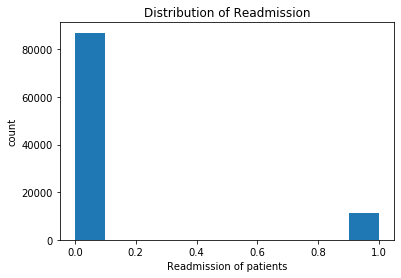

In [62]:
plt.hist(dataset["readmitted"])
plt.title("Distribution of Readmission")
plt.xlabel("Readmission of patients")
plt.ylabel("count")
plt.show()

From this histogram we can infer that, patients who got readmitted after being discharged are very few when compared to patients who didn't get readmitted.

#### Countplot - Time in hospital vs Readmission

Text(0.5, 1.0, 'Time in hospital(in days)  VS. Readmission')

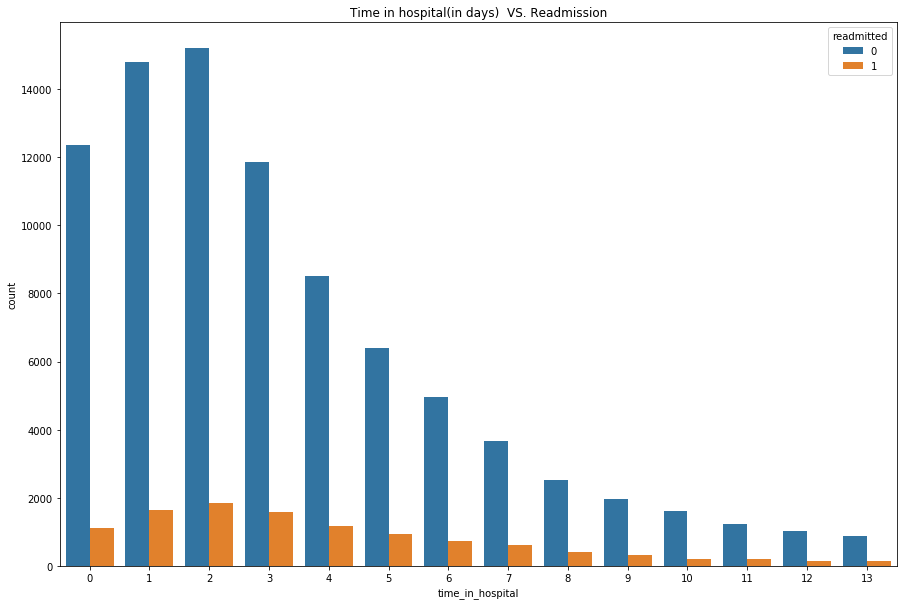

In [63]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x= dataset['time_in_hospital'], hue = dataset['readmitted']).set_title('Time in hospital(in days)  VS. Readmission')

#### Countplot - Race vs Readmission

Text(0.5, 1.0, 'Race  VS. Readmission')

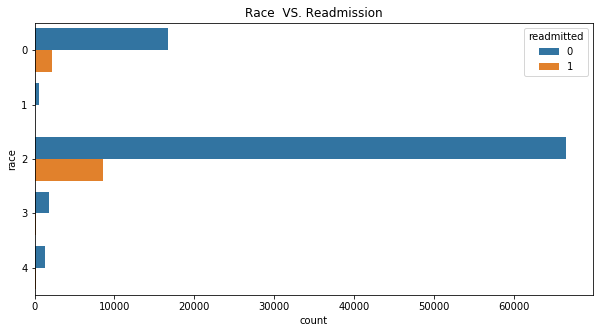

In [64]:
fig = plt.figure(figsize=(10,5))
sns.countplot(y= dataset['race'], hue = dataset['readmitted']).set_title('Race  VS. Readmission')

#### Countplot - Gender vs Readmission

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

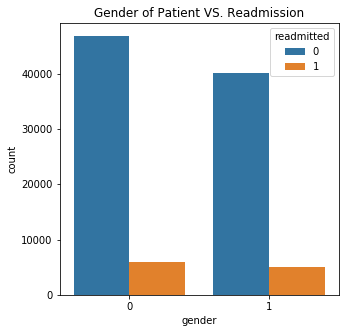

In [65]:
fig = plt.figure(figsize=(5,5))
sns.countplot(dataset['gender'], hue = dataset['readmitted']).set_title("Gender of Patient VS. Readmission")

#### Countplot - Prescribed diabetes medication vs Readmission

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

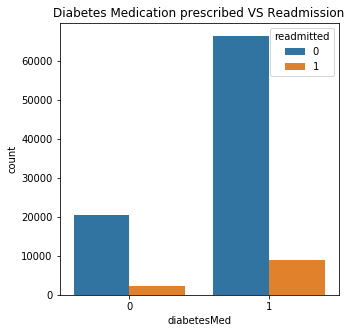

In [66]:
fig = plt.figure(figsize=(5,5))
sns.countplot(dataset['diabetesMed'],hue = dataset['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

In [12]:
dataset.shape

(98052, 30)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98052 entries, 0 to 98051
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   race                      98052 non-null  int64
 1   gender                    98052 non-null  int64
 2   age                       98052 non-null  int64
 3   discharge_disposition_id  98052 non-null  int64
 4   admission_source_id       98052 non-null  int64
 5   time_in_hospital          98052 non-null  int64
 6   num_lab_procedures        98052 non-null  int64
 7   num_procedures            98052 non-null  int64
 8   num_medications           98052 non-null  int64
 9   diag_1                    98052 non-null  int64
 10  diag_2                    98052 non-null  int64
 11  diag_3                    98052 non-null  int64
 12  number_diagnoses          98052 non-null  int64
 13  A1Cresult                 98052 non-null  int64
 14  metformin                 98052 non-nu

## Splitting the dataset

Let us split the dataset into input(x) and output(y) variables to train and test the dataset.

In [14]:
x = dataset.iloc[:,0:29].values
x

array([[  2,   0, 154, ...,   0,   0,   1],
       [  0,   0, 446, ...,   0,   1,   1],
       [  2,   1,   3, ...,   0,   0,   1],
       ...,
       [  2,   1,  15, ...,   0,   0,   1],
       [  2,   0, 670, ...,   0,   0,   1],
       [  2,   1, 356, ...,   0,   1,   0]], dtype=int64)

In [15]:
y = dataset.iloc[:,29:].values
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

### Cross validation and splitting data into train and test 

In [17]:
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(x):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    best_svr.fit(x_train, y_train)
    scores.append(best_svr.score(x_test, y_test))

Train Index:  [ 9806  9807  9808 ... 98049 98050 98051] 

Test Index:  [   0    1    2 ... 9803 9804 9805]


C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 98049 98050 98051] 

Test Index:  [ 9806  9807  9808 ... 19609 19610 19611]


C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 98049 98050 98051] 

Test Index:  [19612 19613 19614 ... 29414 29415 29416]


C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 98049 98050 98051] 

Test Index:  [29417 29418 29419 ... 39219 39220 39221]


C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 98049 98050 98051] 

Test Index:  [39222 39223 39224 ... 49024 49025 49026]


C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 98049 98050 98051] 

Test Index:  [49027 49028 49029 ... 58829 58830 58831]


C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 98049 98050 98051] 

Test Index:  [58832 58833 58834 ... 68634 68635 68636]


C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 98049 98050 98051] 

Test Index:  [68637 68638 68639 ... 78439 78440 78441]


C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 98049 98050 98051] 

Test Index:  [78442 78443 78444 ... 88244 88245 88246]


C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 88244 88245 88246] 

Test Index:  [88247 88248 88249 ... 98049 98050 98051]


C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The error metric computed using the best_svr.score() function is the r2 score. Each iteration of F-Fold CV provides an r2 score. We append each score to a list and get the mean value in order to determine the overall accuracy of the model.

In [20]:
print(np.mean(scores))


-0.0018799704949824304


In [23]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(best_svr, x, y, cv=10)

C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

array([0.09970334, 0.1002222 , 0.10011852, ..., 0.100085  , 0.09971388,
       0.10008026])

cross_val_predict gives the list of predictions.

## RANDOM FOREST

From sklearn.model_selection import cross_val_score.

The function used for Kfolds is called cross_val_score().

The first instance is the Random Forest object, then we pass in our inputs and output. scoring=’accuracy’ means measure the algorithm for accuracy (you can measure other things, I just stick to accuracy). Finally, we have 10 folds.

The function will run the Random Forest classifier with our input/outputs ten times, and measure the accuracy each time.

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
accuracy = cross_val_score(rf, x, y, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of Random Forests is: " , accuracy)

C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: 

Accuracy of Random Forests is:  88.54077434716936


In [54]:
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

C:\Users\pravallika\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.8901580826109128

## LOGISTIC REGRESSION ALGORITHM

Apply the same for logistic regression algorithm and check the accuracy.

In [51]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
accuracylgr = cross_val_score(lgr, x, y, scoring='accuracy', cv = 10).mean() * 100
lgr.fit(x_train, y_train)
lgr.score(x_test, y_test)

C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8926058133605304

In [52]:
print("Acuracy of LOGISTIC REGRESSION is :",accuracylgr)

Acuracy of LOGISTIC REGRESSION is : 88.71415173904602


## SUPPORT VECTOR MACHINE

Apply the same for Support Vector Machine and check the accuracy.

In [31]:
from sklearn.svm import LinearSVC
svm_class = LinearSVC()
accuracy = cross_val_score(svm_class, x,y, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of SVM is: " , accuracy)

C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\pravallika\anaconda3\lib\site-p

Accuracy of SVM is:  82.39861679665573


C:\Users\pravallika\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [55]:
from joblib import dump
dump(rf,'rf.save')

['rf.save']